In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [472]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/KOTAKBANK.csv")

In [473]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,KOTAKMAH,EQ,212.35,220.0,229.35,220.00,229.35,229.35,229.13,7086,1.623640e+11,NaN,NaN,NaN
1,2000-01-04,KOTAKMAH,EQ,229.35,247.7,247.70,225.25,247.70,246.95,244.12,73681,1.798729e+12,NaN,NaN,NaN
2,2000-01-05,KOTAKMAH,EQ,246.95,229.0,240.00,227.20,228.00,228.40,233.75,105799,2.473093e+12,NaN,NaN,NaN
3,2000-01-06,KOTAKMAH,EQ,228.40,235.1,239.00,217.00,224.95,225.90,226.84,40202,9.119546e+11,NaN,NaN,NaN
4,2000-01-07,KOTAKMAH,EQ,225.90,213.0,219.00,207.85,207.85,208.85,209.94,24463,5.135747e+11,NaN,NaN,NaN


In [474]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4985 entries, 0 to 4984
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4985 non-null   object 
 1   Symbol              4985 non-null   object 
 2   Series              4985 non-null   object 
 3   Prev Close          4985 non-null   float64
 4   Open                4985 non-null   float64
 5   High                4985 non-null   float64
 6   Low                 4985 non-null   float64
 7   Last                4985 non-null   float64
 8   Close               4985 non-null   float64
 9   VWAP                4985 non-null   float64
 10  Volume              4985 non-null   int64  
 11  Turnover            4985 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4789 non-null   float64
 14  %Deliverble         4789 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 584.3

In [475]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,4985.000000,4985.000000,4985.000000,4985.000000,4985.000000,4985.000000,4985.000000,4.985000e+03,4.985000e+03,2456.000000,4.789000e+03,4789.000000
mean,696.291755,697.154925,708.147543,684.984112,696.556409,696.615135,696.772050,1.283626e+06,1.355506e+14,54912.741857,6.701163e+05,0.514785
std,440.761023,441.037354,445.558375,435.579256,440.924524,440.938692,440.580761,2.486726e+06,3.589591e+14,60401.337897,1.577341e+06,0.166689
min,27.300000,26.950000,30.000000,26.000000,26.500000,27.300000,27.670000,1.050000e+02,4.608250e+08,375.000000,1.002000e+03,0.062300
25%,355.150000,355.000000,366.900000,346.650000,356.000000,355.600000,355.180000,1.855800e+05,5.388055e+12,19646.500000,1.126580e+05,0.401600
50%,650.950000,652.650000,662.000000,638.450000,650.500000,651.200000,651.390000,7.506900e+05,5.000255e+13,33764.500000,3.548760e+05,0.511100
75%,966.400000,967.000000,979.600000,955.250000,968.000000,966.850000,966.270000,1.577817e+06,1.243851e+14,66802.500000,8.194760e+05,0.631900
max,2019.650000,2016.700000,2049.000000,1999.000000,2023.900000,2019.650000,2028.690000,8.385990e+07,1.498222e+16,846705.000000,5.853186e+07,0.990100


In [476]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [477]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [478]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [479]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [480]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [481]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [482]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
4980,2.867363,1.129310,1759.65,3253062,NaN
4981,2.206373,0.017143,1750.30,4533360,NaN
4982,3.990878,2.777305,1811.45,4174599,NaN
4983,3.644941,-1.101310,1805.00,3960095,NaN
4984,3.595964,-1.752809,1748.80,2621783,NaN


In [483]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_17924\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [484]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [485]:
#Define the prediction model
model = RandomForestRegressor()

In [486]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [487]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.943880106236705


In [488]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [489]:
predictions = model.predict(X_Check)

In [490]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

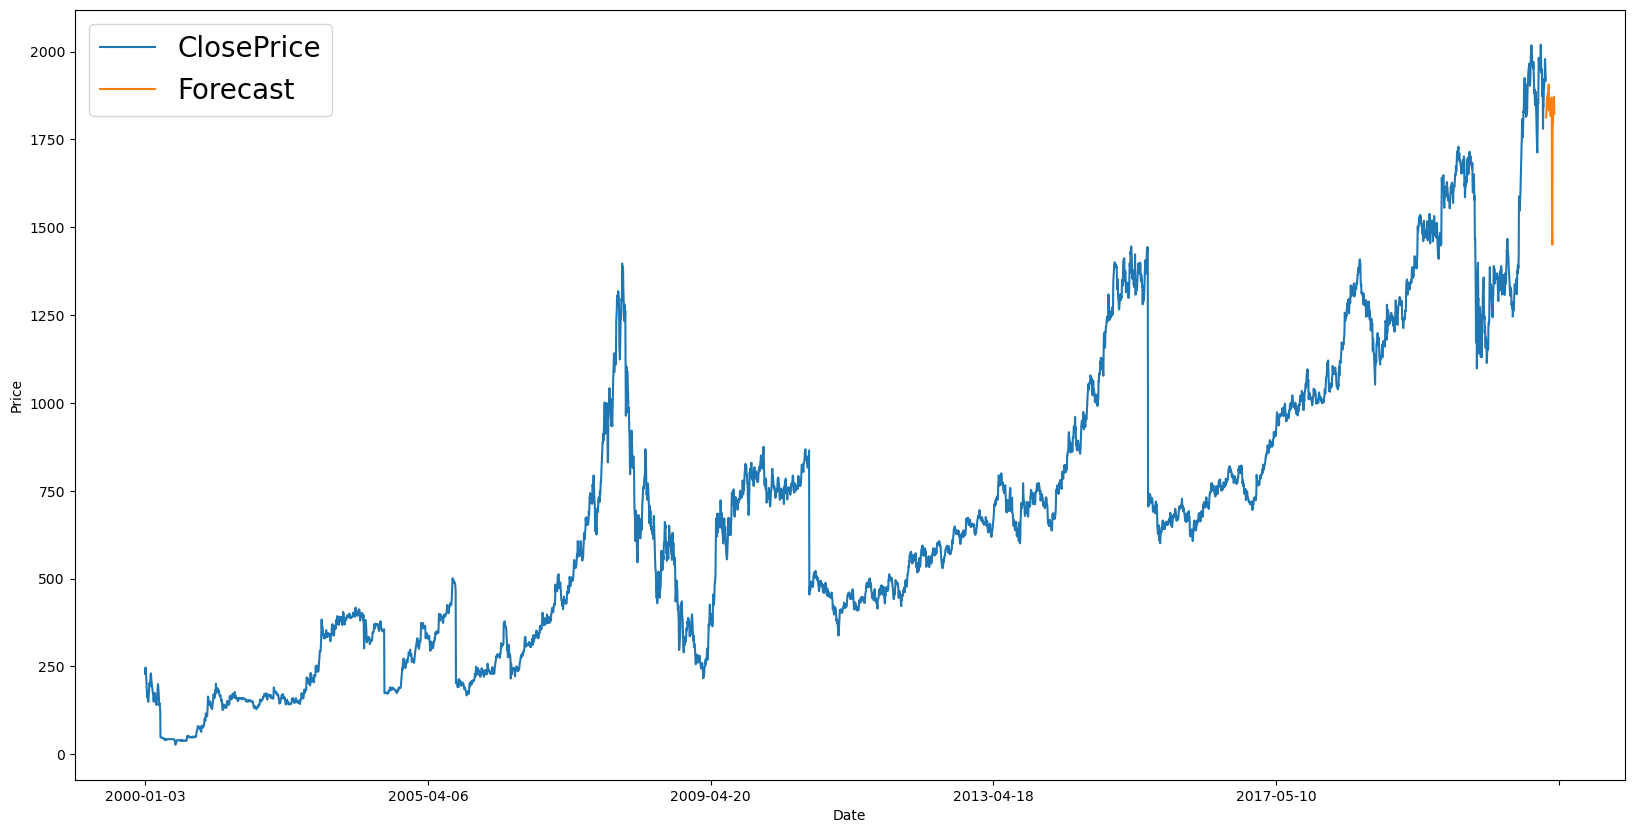

In [491]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')